# 3---ทดสอบใช้งาน Model

## ติดตั้ง Module 

In [ ]:
!python -m pip install --upgrade pip

In [ ]:
!pip install pip --upgrade

In [ ]:
!pip install pydub

In [ ]:
!pip install tensorflow

## ------------------------------------------------------------------------------

In [1]:
import numpy as np
import IPython
from td_utils import *
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
from keras.models import Model, load_model, Sequential
from keras.layers import Dense, Activation, Dropout, Input, Masking, TimeDistributed, LSTM, Conv1D
from keras.layers import GRU, Bidirectional, BatchNormalization, Reshape
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

c:\users\mouy\python\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


## โหลด Model

In [42]:
model=load_model('D:/Babie/DetectHelp/Code_Help/models/help_model_new7.h5')

## Functions ต่างๆที่ใช้

In [43]:
def detect_triggerword(filename):
    plt.subplot(2, 1, 1)
 
    x = graph_spectrogram(filename)
    x  = x.swapaxes(0,1)
    x = np.expand_dims(x, axis=0)
    predictions = model.predict(x)
    
    plt.subplot(2, 1, 2)
    plt.plot(predictions[0,:,0])
    plt.ylabel('probability')
    plt.show() 
    return predictions

In [44]:
chime_file = "D:/Babie/DetectHelp/Code_Test/output2.wav"
def chime_on_activate(filename, predictions, threshold):
    audio_clip = AudioSegment.from_wav(filename)
    chime = AudioSegment.from_wav(chime_file)
    Ty = predictions.shape[1]
    consecutive_timesteps = 0
    
    for i in range(Ty):

        consecutive_timesteps += 1
        if predictions[0,i,0] > threshold and consecutive_timesteps > 75:
            audio_clip = audio_clip.overlay(chime, position = ((i / Ty) * audio_clip.duration_seconds)*1000)
            consecutive_timesteps = 0
        
    audio_clip.export("D:/Babie/DetectHelp/TestModel/SoundModel.wav", format='wav')

In [45]:
def preprocess_audio(filename):
    padding = AudioSegment.silent(duration=10000)
    segment = AudioSegment.from_wav(filename)[:10000]
    segment = padding.overlay(segment)
    segment = segment.set_frame_rate(44100)
    segment.export(filename, format='wav')

## นำไฟล์มาทดสอบตรวจจับ "ช่วยด้วย"

In [54]:
your_filename = "D:/Babie/DetectHelp/TestRecord/Test/testModel2.wav"
# your_filename = "D:/Babie/DetectHelp/Code_Help/train_wave/train1100.wav"

In [55]:
preprocess_audio(your_filename)
IPython.display.Audio(your_filename)

## ทดสอบจับ "ช่วยด้วย"

#### ค่า threshold หรือระดับ probability ที่ตรวจจับ "ช่วยด้วย"

In [56]:
chime_threshold = 0.5

#### กราฟ และ เสียง 

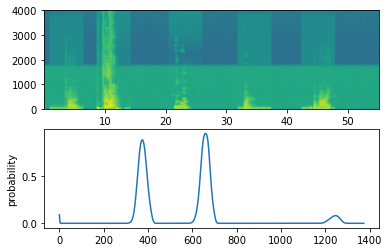

In [57]:
prediction = detect_triggerword(your_filename)
chime_on_activate(your_filename, prediction, chime_threshold)
IPython.display.Audio("D:/Babie/DetectHelp/TestModel/SoundModel.wav")